### STEP-1

In [77]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 

### STEP-2

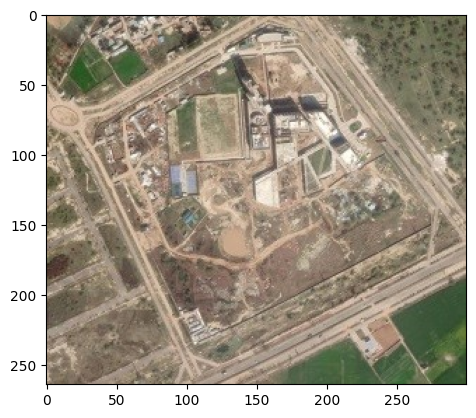

In [78]:
image = cv2.imread('sat_image_plaksha.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting BGR to RGB (since matplotlib reads images in RGB format)
plt.imshow(image_rgb)

### STEP-3

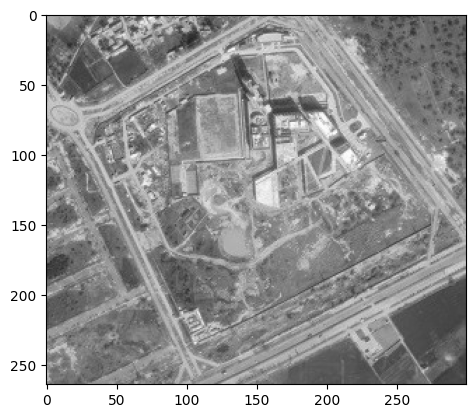

In [79]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image_rgb = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB) #converting BGR to RGB (since matplotib reads images in RGB format))
plt.imshow(gray_image_rgb)

### STEP-4

In [80]:
image_float = gray_image.astype(np.float64) #image to double

### STEP-5

In [81]:
mean_column = np.mean(image_float, axis = 0) 
image_mean_subtracted = image_float - mean_column

### STEP-6

In [82]:
covariance_matrix = np.cov(image_mean_subtracted.T)

### STEP-7

In [83]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

### STEP-8

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1] #descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

### STEP-9

In [85]:
num_components_list = [10, 20, 30, 40, 50, 60, 91, 300]

### STEP-10

In [86]:
output_images = []

for num_components in num_components_list:
    selected_components = eigenvectors[:, :num_components]
    
    projected_data = np.dot(selected_components.T, image_mean_subtracted.T).T
    
    reconstructed_image = np.dot(projected_data, selected_components.T) + mean_column
    
    output_images.append(reconstructed_image)

### STEP-11

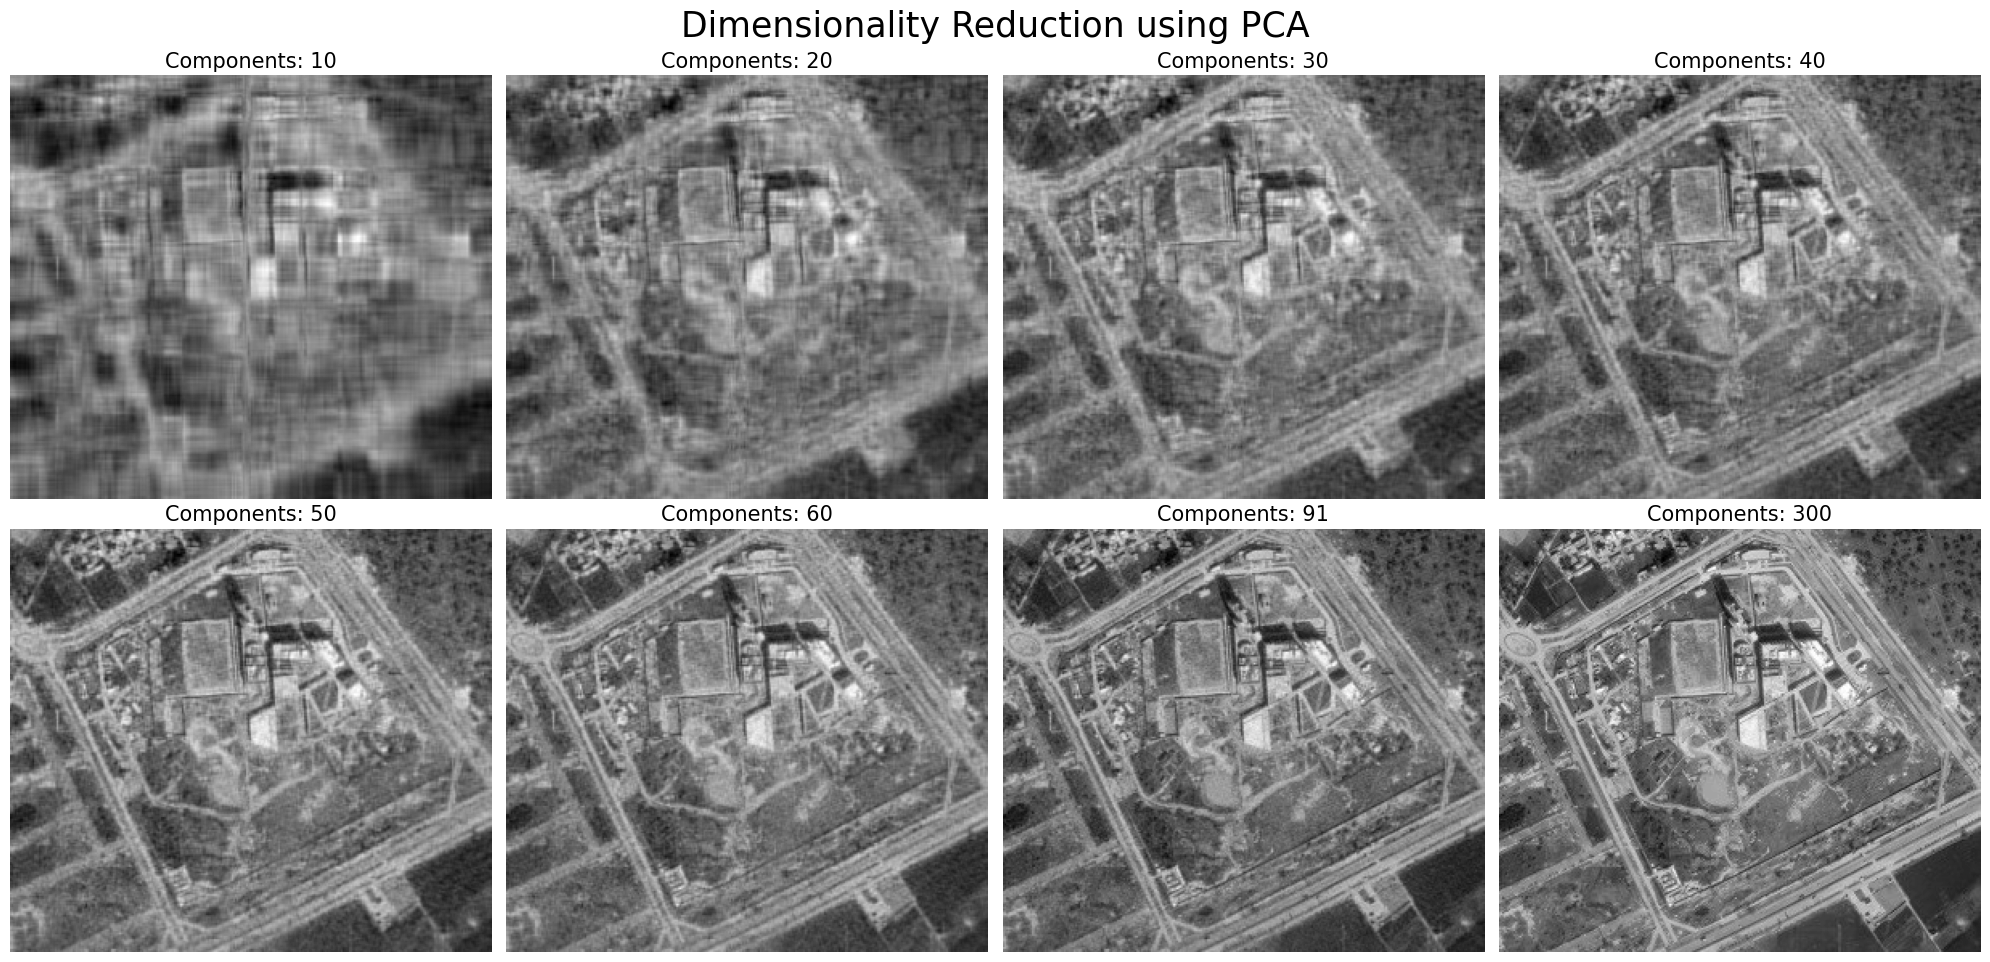

In [87]:
plt.figure(figsize=(20, 10))
plt.suptitle('Dimensionality Reduction using PCA', fontsize=25)

for i, (num_components, img) in enumerate(zip(num_components_list, output_images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Components: {num_components}', fontsize = 15)
    plt.axis('off')

plt.tight_layout()
plt.show()

### STEP-12

In [88]:
from sklearn.decomposition import PCA

num_components = 91

pca = PCA(n_components=num_components)
pca.fit(image_mean_subtracted)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.sum(explained_variance)

print(f"Variance explained by {num_components} components: {cumulative_variance*100:.2f}%")

Variance explained by 91 components: 95.06%


### REPORT

##### *Q1:* What is the difference between PCA and Feature Selection?

- Feature Selection: Chooses a subset of original features, features remain interpretable.

- Creates new features (principal components) by transforming and combining original features. Features are less interpretable

##### *Q2:* Why do we standardize features before applying PCA? 

Features with larger scales dominate the principal components because PCA is sensitive to variance. Standardization (mean=0, std=1) ensures all features contribute equally

##### *Q3:* What is the importance of Covariance Matrix in PCA?

The covariance matrix captures relationships between all feature pairs. Its eigenvectors define the directions of maximum variance (principal components), and eigenvalues indicate the amount of variance along each direction.

##### *Q4:* What are some limitations of PCA?

- Assumes linear relationships between variables
- New components are difficult to interpret
- Sensitive to outliers

##### *Q5:* How can we figure out the importance of individual PCs in PCA?

Use explained variance ratio (pca.explained_variance_ratio_). It shows the proportion of total variance each component captures. Higher values = more important.